## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [1]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

df = sns.load_dataset('penguins')
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


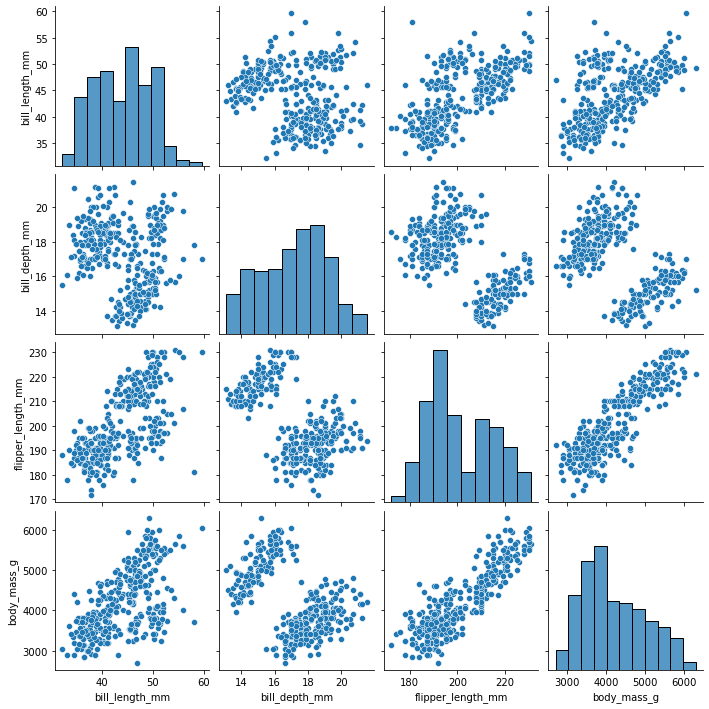

In [2]:
sns.pairplot(df)

#### I notice 2 clear clusters on most graphs. On some i would say 3.

In [3]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=3, random_state=42).fit(df[features])
df['cluster'] = km.predict(df[features])
df.cluster.value_counts()

1    161
0    102
2     70
Name: cluster, dtype: int64

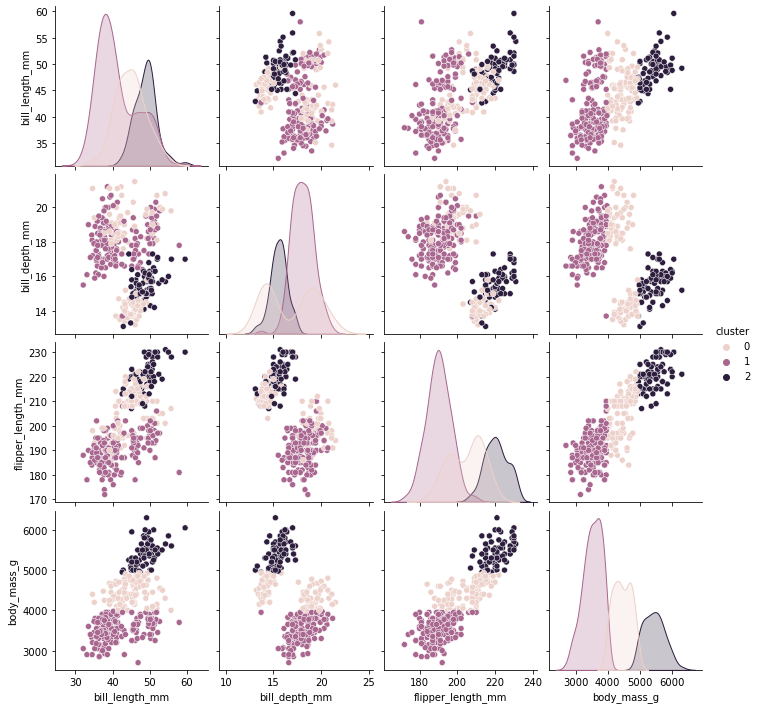

In [4]:
sns.pairplot(df, hue="cluster")

#### The Kmeans cluster algo clustered it largely how i would have expected. Although there are some outliers

In [5]:
metrics.silhouette_score(df[features], km.labels_, metric='euclidean')

0.5751850483957398

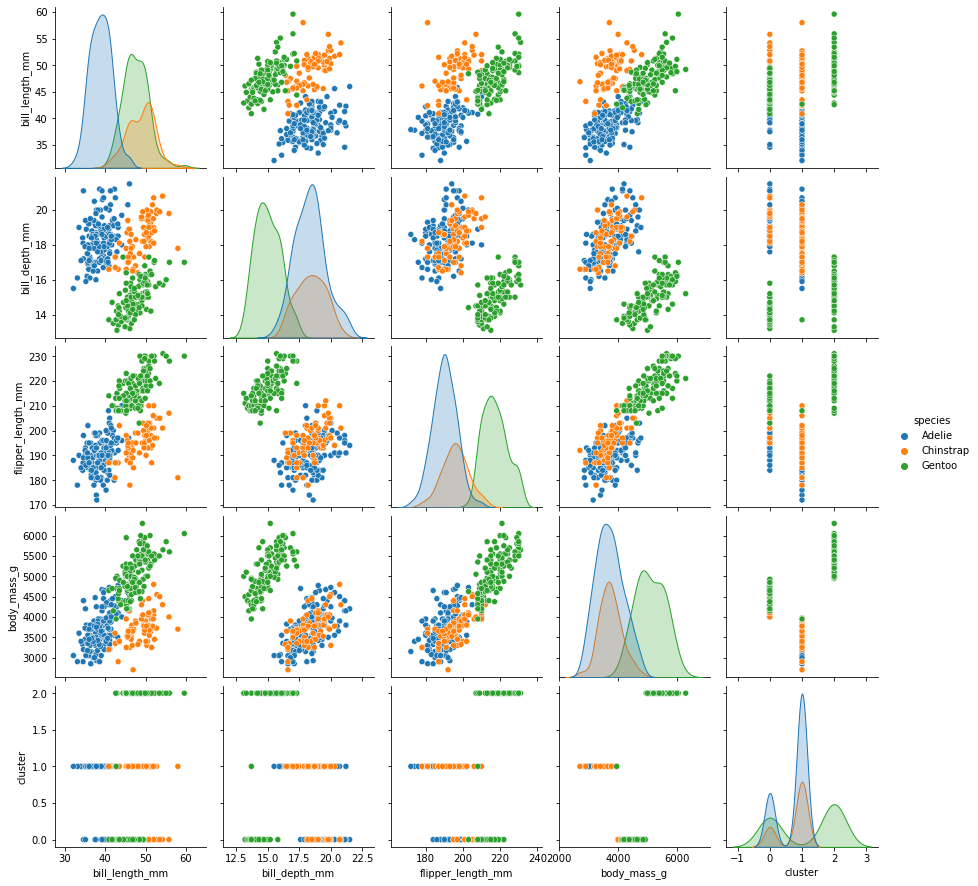

In [6]:
sns.pairplot(df, hue="species")

In [7]:
contingency_table = df.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1,2
species,,,
Adelie,38,108,0
Chinstrap,16,52,0
Gentoo,48,1,70


In [8]:
contingency_table = df.groupby(['species']).size()
contingency_table

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64

A lot of species ended up in the wrong cluster...